# laptop price prediction.

============================================================================================


#### import library

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

#### dataset

In [2]:
laptop_data=pd.read_csv("laptop.csv")

In [3]:
laptop_data.head(1)


,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life


#### Overall analysing  dataset
-----------------------------------
- brand column have good position no need to cleaning
- name column have lot of information so, clean data and fetch new fecture
- price column have well structure so no need for cleaning
- processor column have a lot of ghz imformation so, clean a data
- Processor brand column not show all brand imformation
- ram expandable column have to clean a data some value is like ram show in number some are categorical
- ram column have to do cleaning fetch number part
- Ghz columns do same way like a ram so, have to cleaning
- Display_type have well structure no need of cleaning
- GPU hhd ,battery have to cleaning

# data_cleaning 
===========================================================================
 

In [4]:
def clean(df):
    return(
        df
        .assign(**{
            col:df[col].str.strip()                   #              ------------------>        apply strip on object type data
            for col in df.select_dtypes(include=object).columns
            
        })
        .drop(columns=["Unnamed: 0"])
        .rename(columns=str.lower)
        
        .assign(                                         #            ---------------->                   brand_name
             brand_name=lambda df_:(
                df_
                .name
                .str.split('(',n=1,expand=True)
                .set_axis(["brand_name","other"],axis="columns")
                .drop(columns=["other"])
             )
        
        )
        .assign(                      #                                ------------------->                 windows
             windows=lambda df_:(
                df_
                .name
                .str.split('(',n=1,expand=True)
                .set_axis(["brand_name","other"],axis="columns")
                .drop(columns=["brand_name"])
                .other
                .str.split("|",n=4,expand=True)
                .set_axis(["remove1","processor","ram","windows","remove2"],axis="columns")
                .drop(columns=["remove1","remove2","processor","ram"])
             )
        
        )
        .assign(              #                                       ------------------------->      processor_name
             processor_name=lambda df_:(
                df_
                .name
                .str.split('(',n=1,expand=True)
                .set_axis(["brand_name","other"],axis="columns")
                .drop(columns=["brand_name"])
                .other
                .str.split("|",n=4,expand=True)
                .set_axis(["remove1","processor","ram","windows","remove2"],axis="columns")
                .drop(columns=["remove1","remove2","windows","ram"])
                .processor
                .replace(' ', np.nan)
                .str.strip()
                 
             )
        
        )
        .drop(columns=["name"])
        .drop(columns=["processor_brand"])
        .assign(                                      #                   --------------------------->          ghz
             ghz=lambda df_:(
                df_
               .ghz
               .str.replace("0","2.5")
               .str.split("Ghz",n=1,expand=True)
               .set_axis(["ghz","other"],axis="columns")
               .drop(columns=["other"])
             )
        
        )
        .assign(                           #                    --------------------------->             ram_expandable
             ram_expandable=lambda df_:(
                df_
               .ram_expandable
               .str.replace('Not Expandable',"0 GB")
               .str.split("GB",n=1,expand=True)
               .set_axis(["ram_expandable","other"],axis="columns")
               .drop(columns=["other"])
               .astype(int)
             )
        
        )
        .assign(               #                                     -------------------------->             ram
             ram=lambda df_:(
                df_
               .ram
               .str.split("GB",n=1,expand=True)
               .set_axis(["ram_","other"],axis="columns")
               .drop(columns=["other"])
               .astype(int)
             )
        
        )
         .assign(                    #                                ---------------------------->        ram_type
             ram_type=lambda df_:(
                df_
              .ram_type
              .str.replace('RAM',"")
              .replace('', np.nan)
              .str.strip()
             )
        
        )
        .assign(              #                                  ---------------------------->            display
             display=lambda df_:(
                df_
              .display
              .str.replace('OLED Display With Touchscreen', "15.6")
              .astype(float)
             )
        
        )
        .assign(             #                                    ------------------------------>               gpu
             gpu=lambda df_:(
                df_
              .gpu
              .str.split(",",n=1,expand=True)
              .set_axis(["gpu","other"],axis="columns")
              .drop(columns=["other"])
             )
        
        )
        .assign(              #                                    ----------------------------->             ssd
             ssd=lambda df_:(
                df_
                .ssd
                .str.replace('NO SSD',"0 GB")
                .str.split("GB",n=1,expand=True)
                .set_axis(["ssd","other"],axis="columns")
                .drop(columns=["other"])
                .ssd
                .str.replace('SSD Storage',"")
                .astype(int)
             )
        
        )
        .assign(                #                                   ------------------------->                 hdd
             hdd=lambda df_:(
                df_
                .hdd
                .str.replace('No HDD',"0 GB")
                .str.split("GB",n=1,expand=True)
                .set_axis(["hdd","other"],axis="columns")
                .drop(columns=["other"])
                .hdd
                
                .astype(int)
             )
        
        )
         .assign(              #                            -------------------------->                  battery_life
             battery_life=lambda df_:(
                df_
                .battery_life
                .str.split("Upto",n=1,expand=True)
                .set_axis(["other","battery_life"],axis="columns")
                .drop(columns=["other"])
                .battery_life
                .str.replace('Hrs Battery Life',"")
                .astype(float)
             )
        
        )
        .assign(             #                                      --------------------------->              adapter
            adapter =lambda df_:(
                df_
              .adapter
              
              .replace('no', np.nan)
              .astype(float)
             )
        
        )
        .replace({None: np.nan})
        .drop_duplicates()                   #                            --------------------->   duplicate columns
       

    )

In [5]:
data=clean(laptop_data)

In [6]:
data.head(1)

,brand,price,processor_name,ram_expandable,ram,ram_type,ghz,display_type,display,gpu,gpu_brand,ssd,hdd,adapter,battery_life,brand_name,windows
0,HP,22990,MediaTek Octa Core,0,4,DDR4,2.2.5,LED,11.6,Integrated Graphics,MediaTek,64,0,45.0,12.0,HP Chromebook 11A-NA0002MU,Google Chrome


#### duplicated_value

In [7]:
data.duplicated().sum()

0

Exploratory Data Analysis (EDA)
==========================================================================

High levels summary of data to helpfull train the model


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3966 entries, 0 to 3975
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           3966 non-null   object 
 1   price           3966 non-null   int64  
 2   processor_name  3964 non-null   object 
 3   ram_expandable  3966 non-null   int32  
 4   ram             3966 non-null   int32  
 5   ram_type        3926 non-null   object 
 6   ghz             3966 non-null   object 
 7   display_type    3966 non-null   object 
 8   display         3966 non-null   float64
 9   gpu             3958 non-null   object 
 10  gpu_brand       3962 non-null   object 
 11  ssd             3966 non-null   int32  
 12  hdd             3966 non-null   int32  
 13  adapter         3190 non-null   float64
 14  battery_life    1495 non-null   float64
 15  brand_name      3966 non-null   object 
 16  windows         3966 non-null   object 
dtypes: float64(3), int32(4), int64(1), obj

#### observation
- total data(rows) - `3975` & total columns -` 17`
- float64(1), int32(4), int64(1), object(11)
- object=>`brand`,`processor_name`,`ram_type`,`ghz`,`display_type`,`gpu`,`gpu_bran`,`adapte`,`battery_life`,`brand_name`,`window`
- int =>`price`, `ram_expandable`, `ram`, `ssd`, `hdd`
- float => `display`
- null value => `processor_name`,`ram_type` ,`gpu`,`gpu_brand`,`battery_life`
  

#### null_value 

In [9]:
(data.isnull().sum() / len(data)) * 100

brand              0.000000
price              0.000000
processor_name     0.050429
ram_expandable     0.000000
ram                0.000000
ram_type           1.008573
ghz                0.000000
display_type       0.000000
display            0.000000
gpu                0.201715
gpu_brand          0.100857
ssd                0.000000
hdd                0.000000
adapter           19.566314
battery_life      62.304589
brand_name         0.000000
windows            0.000000
dtype: float64

Insights:
> `numerical type data `
-  adapter,  battery_life
> `object type data`
- processor_name , ram_type,  gpu, gpu_bran 
  

#### numerical type of analysis

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,3966.0,72475.052446,52251.985731,7990.00,39892.5,58990.0,84990.0,503890.0
ram_expandable,3966.0,10.876954,15.670262,0.00,0.0,0.0,16.0,64.0
ram,3966.0,11.152295,6.367794,2.00,8.0,8.0,16.0,64.0
display,3966.0,15.068810,1.029898,10.10,14.0,15.6,15.6,18.0
ssd,3966.0,462.138931,347.854042,0.00,256.0,512.0,512.0,4098.0
hdd,3966.0,246.695159,445.887041,0.00,0.0,0.0,0.0,2048.0
adapter,3190.0,80.277116,55.159920,15.00,45.0,65.0,65.0,330.0
battery_life,1495.0,8.391023,3.266268,2.25,6.0,8.0,10.0,23.5


#### observation
- price(target) - the max price of laptop is 503890 and min is 7990
- ram expandable - maximum 64 gb and min is 0 gb
- ram - max is 64gb and min is 2 gb
  

#### category type of analysis

In [11]:
data.describe(include="O").T

,count,unique,top,freq
brand,3966,31,ASUS,989
processor_name,3964,102,Core i5 11th Gen,350
ram_type,3926,9,DDR4,2817
ghz,3966,31,4.2,330
display_type,3966,2,LCD,2026
gpu,3958,260,UHD,650
gpu_brand,3962,11,Intel,1934
brand_name,3966,2918,Dell Inspiron 15 3511,38
windows,3966,15,Windows 11,2127


#### observation 
-  most popular brand is asus 989 times occurs & 31 unique brands
-  core i5 11th gen is processor that occuring value most 350
-  ram_type DDR4 on top & its occur 2817
-  Dell Inspiron 15 3511 is a laptop 38 times occurs 
-  windows 11 is on top 

#### correlation matrix(heatmap)

<Axes: >

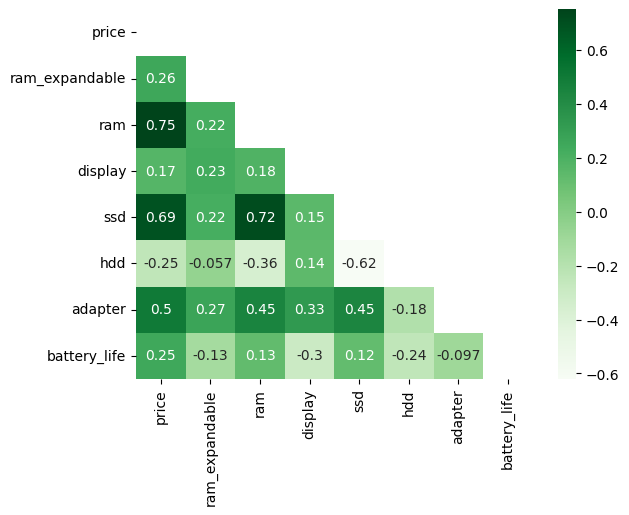

In [12]:
corr_matrix = data.corr(numeric_only='TRUE')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(data=data.corr(numeric_only='TRUE'),cmap="Greens",annot=True,mask=mask)

#### correlation observation
- price (traget) is highly correlated to ssd & ram
- moderate correlated with price is display & ram expandable
- negative correlated with target (price ) is hdd
- ssd and ram have a high correlaton 77%

#### pairplot

<Figure size 3000x1000 with 0 Axes>

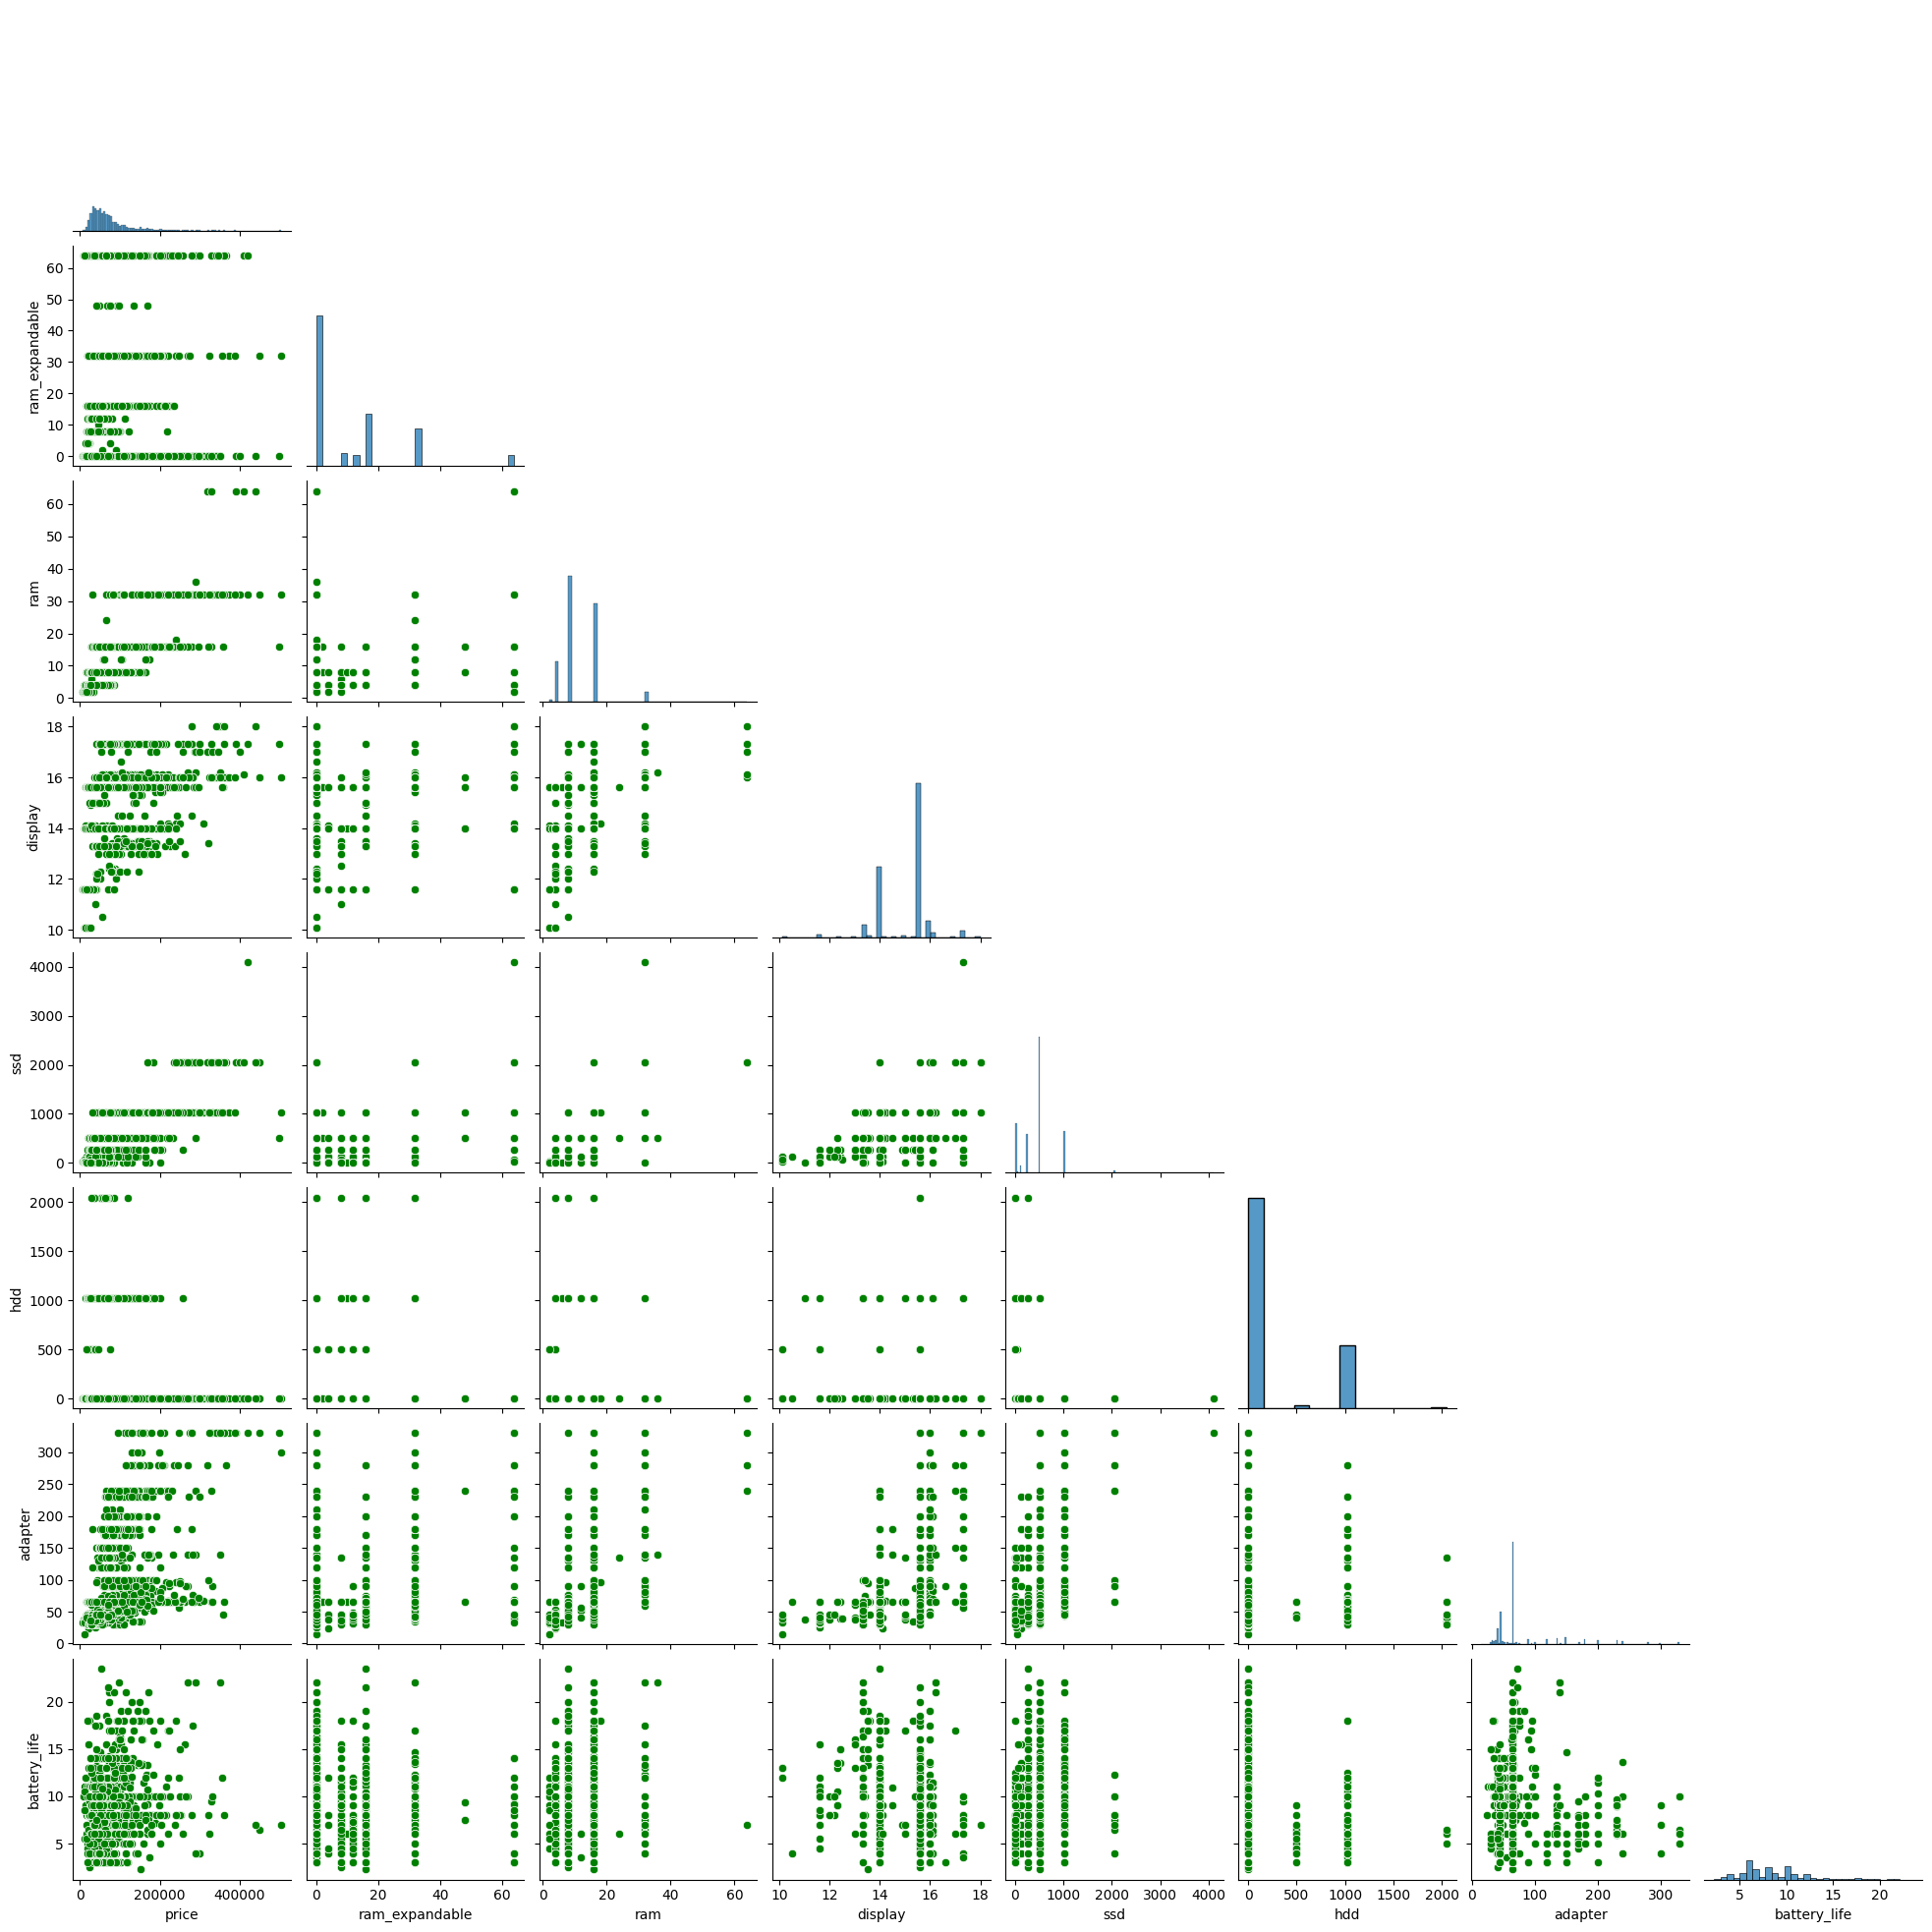

In [13]:
plt.figure(figsize=(30,10))
sns.pairplot(data,corner=True,plot_kws={'color': 'green'});

> Insights:
- The pattern in the plot represents continuous data with a non-linear relationship is price and battery_life
- There might be a weak positive correlation since higher prices seem to have a wider range of adapter values, but the relationship is not strong or consistent.
- The price does not appear to follow a clear increasing trend with HDD capacity & The scattered nature suggests a weak or non-linear correlation.
- The correlation is likely weak or moderate between price and display

#### numerical value 
> distplot

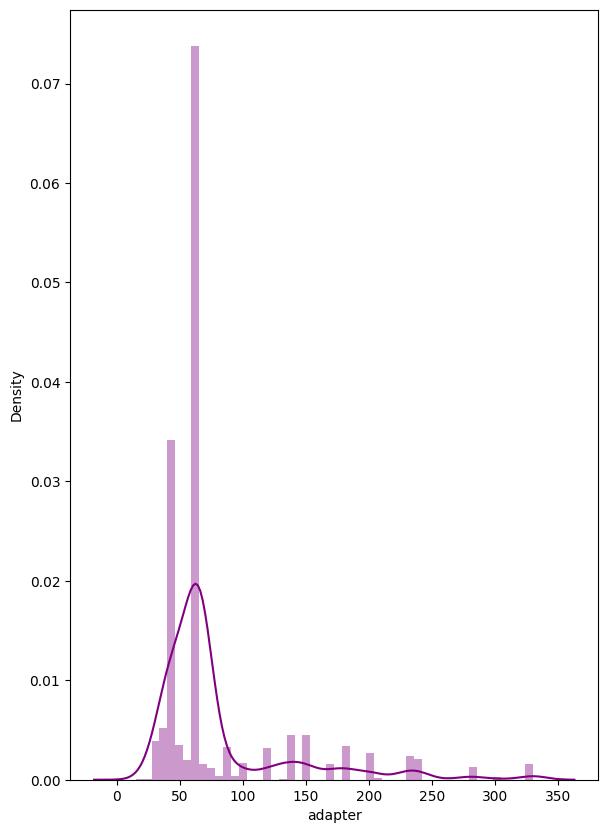

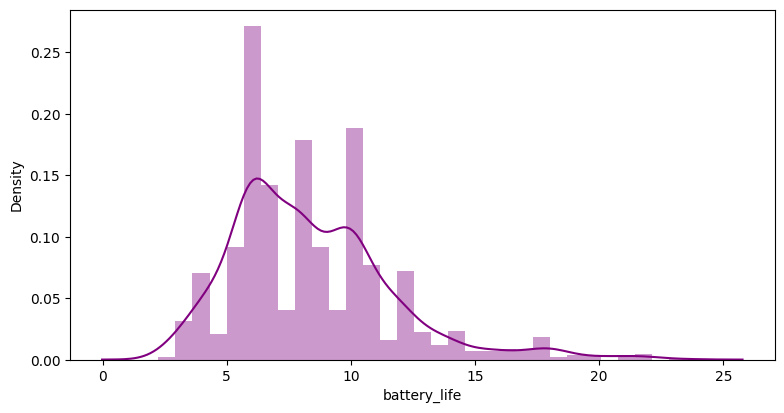

In [14]:
features = ["adapter", "battery_life"]
fig_sizes = [(15, 10), (20, 10)]
subplots = [(1, 2, 1), (2, 2, 2)]

for feature, fig_size, subplot in zip(features, fig_sizes, subplots):
    plt.figure(figsize=fig_size)
    plt.subplot(*subplot)
    sns.distplot(data[feature],color='purple')
    plt.show()

> observation
- battery & adapter is  right skewed  have a nan value so we fill median


# sepreate input & output

In [15]:
input_data=data.drop(columns="price")
output_data=data["price"]

# train_test_split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Split into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(input_data,output_data, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets (80% train, 20% val)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)


In [18]:
# shape(total rows and column)
series = {
    "x_train": x_train,
    "x_test": x_test,
    "x_val": x_val,
   
}

for name, data in series.items():
    print(f"{name}: {data.shape}")


x_train: (2379, 16)
x_test: (794, 16)
x_val: (793, 16)


# import library for model building

In [19]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline

from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import VotingRegressor,BaggingRegressor,AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector

# apply  Columns transformer & pipline
-----------------------------------------
null value are present
>`numerical type data `
-  adapter,  battery_life,( fill with median)
>`object type data`
- processor_name , ram_type,  gpu, gpu_bran , (fill with mode )

`apply onehotencoder on categorical columns`
- 'brand', 'processor_name', 'ram_type', 'ghz', 'display_type', 'gpu','gpu_brand', 'brand_name', 'windows'
- ------------------------------------------


In [20]:
# Identify column types
numerical_features = ['adapter', 'battery_life']
categorical_features = ['brand', 'processor_name', 'ram_type', 'ghz', 'display_type', 'gpu','gpu_brand', 'brand_name', 'windows']


# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median")),  # Fill missing values with mean
    ('scaler', StandardScaler())  # Standardize numerical features
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore',drop='first'))  # Encode categorical variables
])


# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],remainder='passthrough')






# individual models
model=[
    ("m1",RandomForestRegressor(
                                    n_estimators=300,
                                    max_depth=25,
                                    criterion="squared_error",                      
                                    min_samples_split=7,
                                    min_samples_leaf=1,              
                                    min_impurity_decrease=0.1,
                                    max_features=0.5,
                                    max_leaf_nodes =17 ,                     
                                    ccp_alpha = 0.01,
                                    max_samples = 0.25,
                                    bootstrap=True,
                                    oob_score=True)
    ),
    ("m2",DecisionTreeRegressor(
                                    max_depth=25,
                                    criterion='squared_error',                      
                                    min_samples_split=20,
                                    min_samples_leaf=3,              
                                    min_impurity_decrease=0.1,
                                    max_features=0.6,
                                    max_leaf_nodes =17 ,                     
                                    ccp_alpha = 0.1,
                                    splitter="random",)

    ),
    ('m3',KNeighborsRegressor(
                                    n_neighbors=5,
                                    algorithm='ball_tree')
    )
]

# individual models

# Create Voting Regressor
voting_model = VotingRegressor(estimators=model, weights=[2,3,7])

# Create final pipeline with Voting Regressor
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", voting_model)
])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', voting_model)
])

# Fit the model
model.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['adapter', 'battery_life']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore')...
                                                                    max_leaf_nodes=17,
                                                                    max_samples=0.25,
                                                                    min_impurity_decrease=0.1,
                                                                    min_samples_split=7,
                                                                    n_estimators=300,
                                                                    oob_score=True)),
                                             ('m2',
                                              DecisionTreeRegressor(ccp_alpha=0.1,
                                                                    max_depth=25,
                                                                    max_features=0.6,
                                                                    max_leaf_nodes=17,
                                                                    min_impurity_decrease=0.1,
                                                                    min_samples_leaf=3,
                                                                    min_samples_split=20,
                                                                    splitter='random')),
                                             ('m3',
                                              KNeighborsRegressor(algorithm='ball_tree'))],
                                 weights=[2, 3, 7]))])

In [21]:
model.score(x_train,y_train),model.score(x_test,y_test)

(0.8225186990225453, 0.6999629639896436)

# cross_val_score

In [22]:
# Evaluate model
cv_scores = cross_val_score(model, x_train, y_train, cv=10, scoring="r2")
print("Cross-validation R2 scores:", cv_scores)
print("Mean R2 Score:", np.mean(cv_scores))


Cross-validation R2 scores: [0.71421068 0.77713995 0.7963671  0.74727668 0.70869263 0.73327209
 0.73592281 0.72722037 0.73637839 0.80807096]
Mean R2 Score: 0.7484551638867348


# train & test performance

In [23]:

y_train_pred = model.predict(x_train)
y_pred = model.predict(x_test)
print("Train R2 Score:", r2_score(y_train, y_train_pred))
print("Test R2 Score:", r2_score(y_test, y_pred))


Train R2 Score: 0.8225186990225453
Test R2 Score: 0.6999629639896436


# exporting the pipeline

In [24]:
import pickle

In [25]:
pickle.dump(model,open('model_.pkl','wb'))

In [26]:
pickle.dump(data,open('data.pkl','wb'))
